In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color blind friendly palette  (https://gist.github.com/thriveth/8560036)
plt.style.use('tableau-colorblind10')  
plt.style.library['tableau-colorblind10'] 

RcParams({'axes.prop_cycle': cycler('color', ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']),
          'patch.facecolor': '#006BA4'})

# DATA ANALYSIS. SURVEYS VOTES FOR AGE

In this notebook, we conduct a detailed statistical analysis of the survey responses. Specifically, we explore the distributions and patterns of the three key thermal perception questions: Thermal Survey, Thermal Comfort and Walking Thermal Comfort. We use histograms and bar plots to visualize and explore how thermal perceptions vary across different sociodemographic groups of age (<12, 13-15, 16-24, 25-54, 55-84)

We use the dataset **all_surveys(votes).csv**: This dataset contains one row per vote (i.e., a TSV/TCV/wTCV response), along with the corresponding sociodemographic information of the respondent. Note: Since participants provided responses at multiple stops, individual participants may appear more than once.



### INDEX

<br>

1. Socio-demographic statistics for AGE: TCV, wTCV and TSV

        1.1. Age general statistics
        
        1.2. Statistics for TCV, wTCV and TSV
        
        1.3. Histograms
        
        1.4. Horizontal bar-plots
   
<br>       
       
2. Grouping in three categories: <12, 13-15 and >16

       2.1. Statistics
       
       2.2. Histograms
       
       2.3. Line-plots
       
       2.4. Horizontal bar-plots
        
        
        
<br>       
       
2. Using only <12 and 13-15

       2.1. Statistics
       
       2.2. Histograms
       
       2.3. Line-plots
       
       2.4. Horizontal bar-plots
              

## 0. Read data-sets

In [3]:
# Read csv data (please, write the correct directory adress where the data is located in your computer)
df_votes = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(votes).csv')  # votes

df_votes_age = df_votes.copy()


## 1. Socio-demographic statistics for AGE: TCV, wTCV, TSV


### 1.1. Age general statistics

age2
13-15    736
<12      687
16-24    196
25-54    148
55-84    100
Name: count, dtype: int64

age2
13-15    39.4
<12      36.8
16-24    10.5
25-54     7.9
55-84     5.4
Name: proportion, dtype: float64


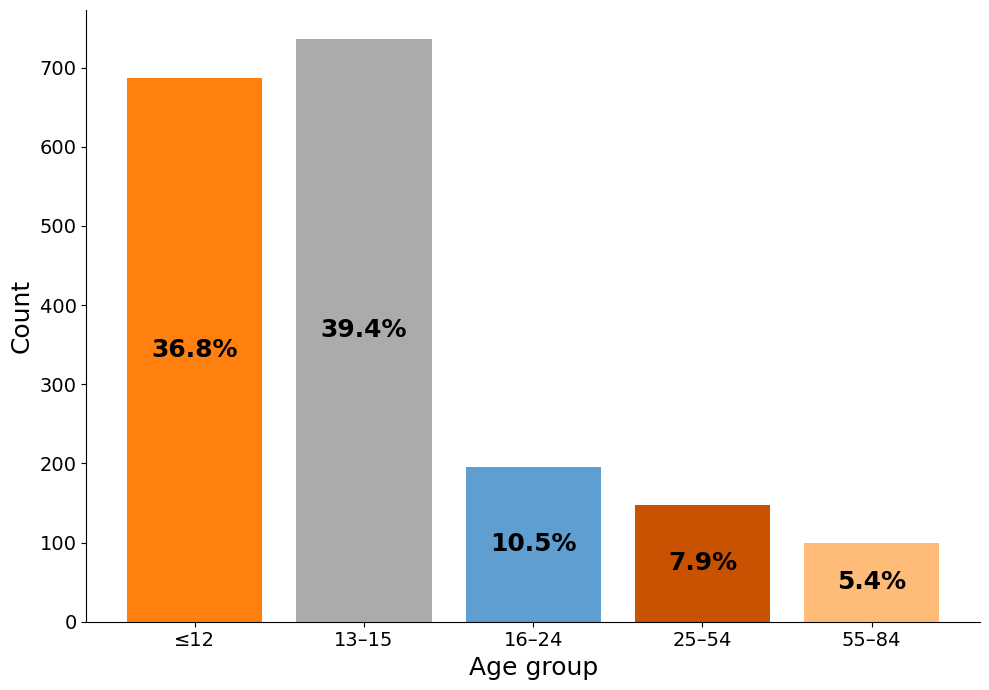

In [7]:
print(df_votes_age['age2'].value_counts())
print('')

print(df_votes_age['age2'].value_counts(normalize=True).mul(100).round(1))


age_order = ['<12','13-15','16-24','25-54','55-84']

# Count the number of occurrences for each age group and sort
counts = df_votes_age['age2'].value_counts().reindex(age_order)
total = counts.sum()

# Clean up the age group labels (replace '<12' with '≤12')
age_labels_raw = counts.index.tolist()
age_labels_clean = ['≤12', '13–15', '16–24', '25–54', '55–84']  # For display

# Define custom colors for each age group (optional, can be changed)
colors = ["#FF800E", "#ABABAB","#5F9ED1","#C85200","#FFBC79"]

# Convert counts to percentages and format as strings
percentages = [f'{(count / total) * 100:.1f}%' for count in counts]

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 7))

# Create the bar plot
bars = ax.bar(age_labels_clean, counts, color=colors)

# Add percentage labels centered inside each bar
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, percent,
            ha='center', va='center', color='black', fontsize=18, weight='bold')

# Axis labels and tick styling
ax.set_xlabel('Age group', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.tick_params(axis='both', labelsize=14)

# Remove top and right borders for a cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()



### 1.2. Statistics for TCV, wTCV and TSV

In [8]:
columns = ['thermal_comfort', 'thermal_comfort_walking', 'thermal_sensation']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in df_votes_age.groupby(['age2']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')
    

################
thermal_comfort
################

13-15
-------
thermal_comfort
Neutral                   214
Slightly comfortable      141
Slightly uncomfortable    129
Comfortable               128
Uncomfortable              66
Very comfortable           39
Very uncomfortable         19
Name: count, dtype: int64

16-24
-------
thermal_comfort
Neutral                   47
Comfortable               32
Slightly uncomfortable    32
Slightly comfortable      30
Uncomfortable             25
Very uncomfortable        23
Very comfortable           7
Name: count, dtype: int64

25-54
-------
thermal_comfort
Slightly uncomfortable    40
Slightly comfortable      30
Uncomfortable             24
Neutral                   24
Comfortable               22
Very comfortable           6
Very uncomfortable         2
Name: count, dtype: int64

55-84
-------
thermal_comfort
Slightly uncomfortable    24
Neutral                   21
Slightly comfortable      21
Comfortable               17
Uncomfortable   

### 1.3. Histograms


The histograms are normalized such as the votes for each "answer" sum 1. In this way, this histogram is useful to compare a given socio-dem category in a given (individual) answer of the survey. 

For example: if we analyze the answer "Very uncomfortable" from the "Thermal comfort" histogram, we'll see how many votes correspond to each age category. In other words, "If I vote this answer of thermal comfort, what is the probability that I'm <12 or 13-15 or...?"

Note that this normalization does not allow us to compare the whole distribution (tendency) of votes, we use the horitzontal bar-plots for this purpose).


In [9]:
def grouped_histogram(df, response_col, group_col, category_order, group_palette=None, hue_order=None,
                      xlabel=None, ylabel='Probability', legend_title=None, group_labels=None, figsize=(1.5, 5)):
    '''
    Plots a grouped bar chart showing the normalized distribution of a categorical response variable
    (e.g., thermal comfort) across different groups (e.g., gender,age).

    Parameters:
        df (pd.DataFrame): The input DataFrame containing both the response and group columns.
        response_col (str): Name of the column containing the survey responses (e.g., 'thermal_comfort').
        group_col (str): Name of the grouping column (e.g., 'gender').
        category_order (list): Ordered list of response categories for the x-axis.
        group_palette (list or dict): Custom color palette for the groups.
        hue_order (list): Specific order of group values (e.g., ['Man', 'Woman']).
        xlabel (str): Label for the x-axis. If None, uses `response_col`.
        ylabel (str): Label for the y-axis.
        legend_title (str): Title for the legend (hue).
        group_labels (list): Replacement labels for the legend (e.g., ['Men', 'Women']).
        figsize (tuple): Aspect and height of the figure (aspect, height).
    
    Returns:
        None. Displays the plot directly.
    '''

    # Normalize counts (grouped by response and group column)
    df_norm = df.groupby(response_col)[group_col].value_counts(normalize=True).rename('proportion').reset_index()

    # Ensure correct order of the response categories
    df_norm[response_col] = pd.Categorical(df_norm[response_col], categories=category_order, ordered=True)
    df_norm.sort_values(by=response_col, inplace=True)

    # Plot
    aspect, height = figsize
    g = sns.catplot(
        x=response_col,
        y='proportion',
        hue=group_col,
        kind='bar',
        data=df_norm,
        palette=group_palette,
        hue_order=hue_order,
        alpha=1.0,
        width=0.6,
        height=height,
        aspect=aspect
    )

    # Format axis labels and ticks
    g.set_xticklabels(category_order, rotation=30, fontsize=11)
    plt.yticks(fontsize=11)
    g.set_axis_labels(xlabel or response_col, ylabel, fontsize=13)

    # Legend title
    if legend_title:
        g._legend.set_title(legend_title)

    # Replace legend labels if provided
    if group_labels:
        for t, new_label in zip(g._legend.texts, group_labels):
            t.set_text(new_label)

    plt.show()

    
    

Thermal comfort TCV


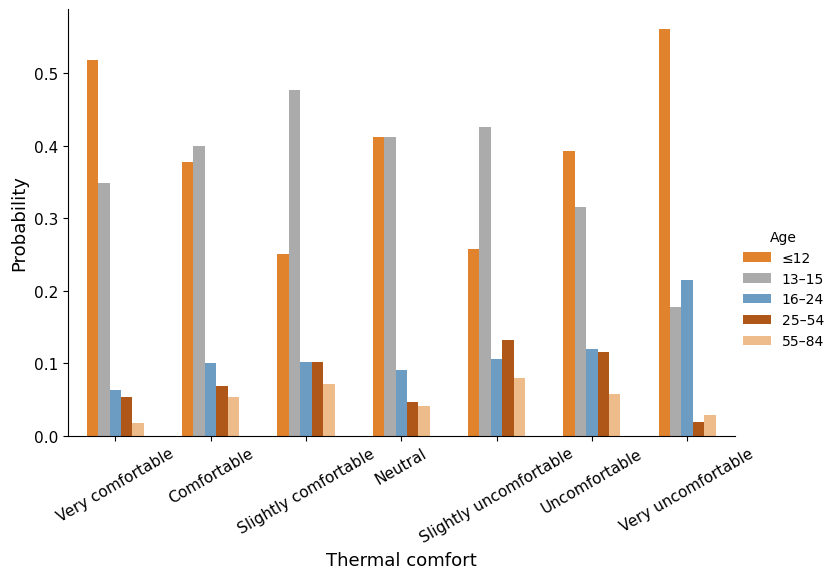

Walking thermal comfort wTCV


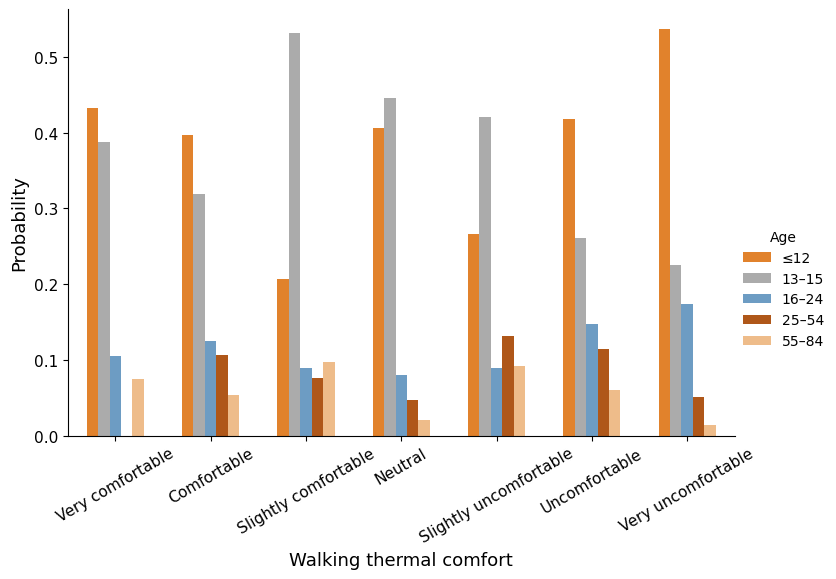

Thermal sensation TSV


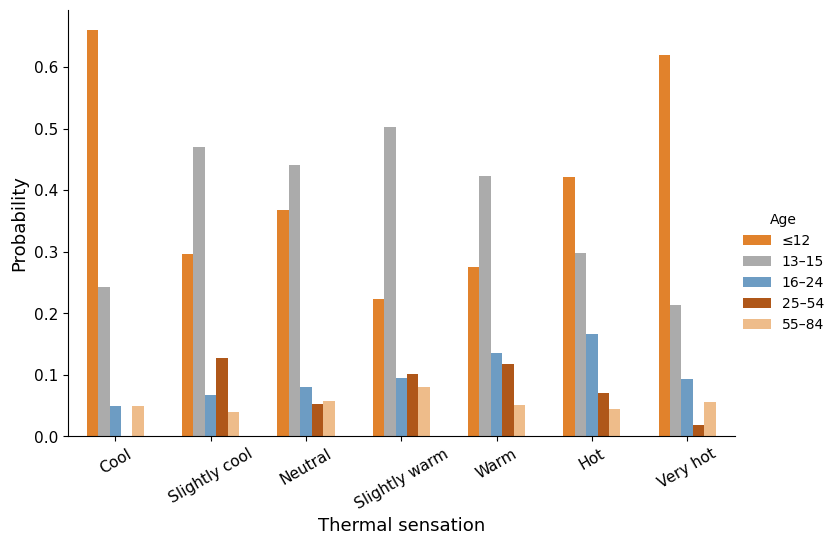

In [10]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


order_age = ['<12','13-15','16-24','25-54','55-84']
palette_age = ["#FF800E", "#ABABAB","#5F9ED1","#C85200","#FFBC79"]
age_labels_clean = ['≤12', '13–15', '16–24', '25–54', '55–84']

# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
grouped_histogram(df = df_votes, response_col = 'thermal_comfort',group_col = 'age2', category_order = categories_TCV_and_wTCV, 
                  group_palette=palette_age, hue_order = order_age, xlabel='Thermal comfort',
                  legend_title = 'Age', group_labels = age_labels_clean) 

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
grouped_histogram(df = df_votes, response_col = 'thermal_comfort_walking',group_col = 'age2', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_age, hue_order = order_age, xlabel='Walking thermal comfort',
                  legend_title = 'Age', group_labels = age_labels_clean) 

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
grouped_histogram(df = df_votes, response_col = 'thermal_sensation',group_col = 'age2', category_order = categories_TSV, 
                  group_palette = palette_age, hue_order = order_age, xlabel='Thermal sensation',
                  legend_title = 'Age', group_labels = age_labels_clean) 

### 1.4. Horizontal bar-plots

In [11]:
def survey_plot(results, category_names, column_name=None):
    '''
    Plots a horizontal stacked bar chart showing the percentage distribution of responses across ordered categories.
    Special styling is applied for specific cases like 'thermal_sensation'.

    Parameters:
        results (dict): Keys are group labels (e.g., 'All', 'Women', 'Men'), 
                        values are lists of counts per category (must match category_names length).
        category_names (list): Ordered list of category labels (e.g., from cool to hot).
        column_name (str, optional): If set to 'thermal_sensation', applies specific color customizations.

    Returns:
        fig, ax: The matplotlib Figure and Axes objects.
    '''

    labels = list(results.keys())
    data = np.array(list(results.values()))  # Shape: (n_groups, n_categories)

    # Convert to percentages
    total_votes = data.sum(axis=1)
    percentages = ((data.T / total_votes) * 100).T
    cumulative = percentages.cumsum(axis=1)

    # Define color palette
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(11, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 100)

    for i, (label, color) in enumerate(zip(category_names, category_colors)):
        # Optional color override for thermal_sensation
        if column_name == 'thermal_sensation':
            if i == 2:  # Neutral category (index 2)
                color = category_colors[3]
            elif i == 3:
                color = np.array([0.98746328, 0.9067397, 0.65926182, 1.])  # Light beige

        widths = percentages[:, i]
        starts = cumulative[:, i] - widths

        rects = ax.barh(labels, widths, left=starts, height=0.75, label=label, color=color)

        for j, rect in enumerate(rects):
            if widths[j] > 2:  # Only show text if the bar segment is visible
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    rect.get_y() + rect.get_height() / 2,
                    f'{int(round(widths[j]))}%',
                    ha='center', va='center', fontsize=11, color='black'
                )

        # Add 1–7 scale below bar (only once for the first row)
        if len(labels) == 1:
            if i == 0:
                center = cumulative[0][i] / 2
            else:
                center = cumulative[0][i - 1] + (widths[0] / 2)
            ax.text(center, 0.7, str(i + 1), fontsize=11, ha='center')

    # Add quartile lines
    for x in [25, 50, 75]:
        ax.axvline(x, ymin=0.05, ymax=0.95, color='black', linestyle='--', linewidth=1, alpha=0.3)

    # Clean up axes
    ax.tick_params(labelsize=14)
    #for spine in ['top', 'bottom', 'left', 'right']:
        #ax.spines[spine].set_visible(False)

    return fig, ax


Thermal comfort TCV


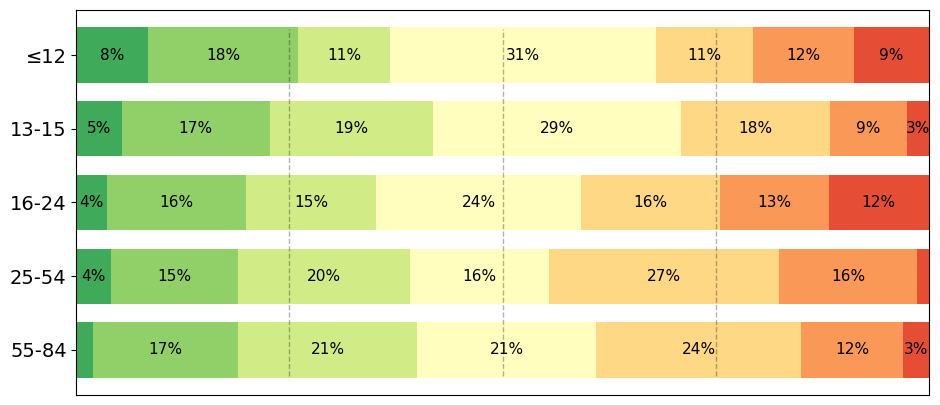

Walking thermal wTCV


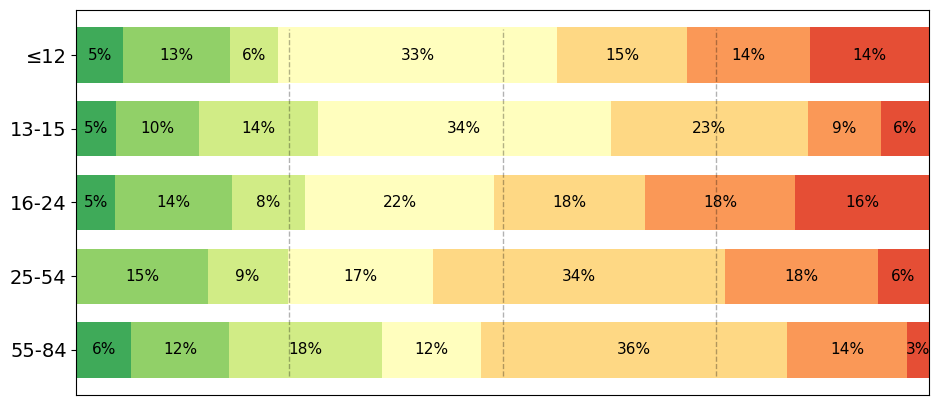

Thermal sensation TSV


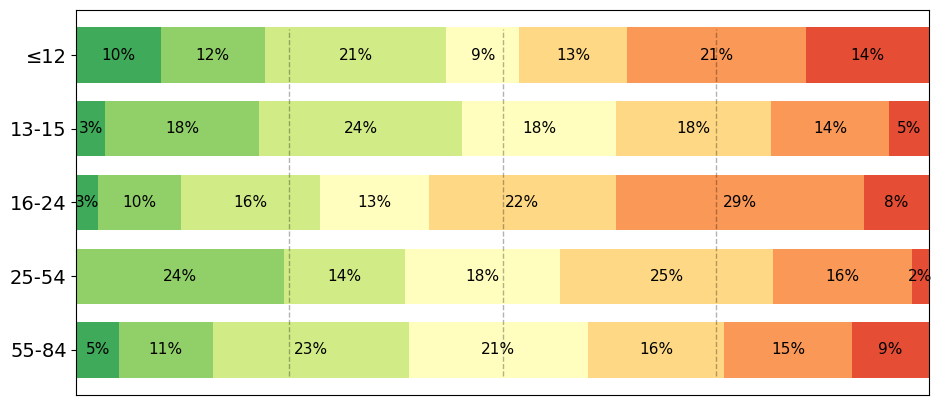

In [21]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']

categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


def count_responses_for_age(df, name_column, name_group, order_list):
    result = {}

    # Personalized tags for the gender
    tags_age = {"<12": "≤12", "13-15": "13-15", "16-24": "16-24", "25-54": "25-54", "55-84": "55-84"}
    
    # Count by gender
    for age, tags in tags_age.items():
        filtered = df[df[name_group] == age]
        counts = filtered[name_column].value_counts().reindex(order_list, fill_value=0)
        result[tags] = counts.tolist()

    return result


# BAR-PLOT THERMAL COMFORT
print('Thermal comfort TCV')
results_age_TCV = count_responses_for_age(df_votes_age, 'thermal_comfort', 'age2', categories_TCV_and_wTCV )
fig, ax = survey_plot(results_age_TCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT THERMAL COMFORT
print('Walking thermal wTCV')
results_age_wTCV = count_responses_for_age(df_votes_age, 'thermal_comfort_walking', 'age2', categories_TCV_and_wTCV )
fig, ax = survey_plot(results_age_wTCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT THERMAL COMFORT
print('Thermal sensation TSV')
results_age_TSV = count_responses_for_age(df_votes_age, 'thermal_sensation', 'age2', categories_TSV )
fig, ax = survey_plot(results_age_TSV, categories_TSV)  # Plot
plt.show()


<br>

## 2. Grouping in three categories: <12, 13-15 and >16

### 2.1. Statistics

In [16]:
age=[]
for i in range(len(df_votes_age)):
    if df_votes_age['age2'][i] == '<12':
        age.append('<12')     
        
    elif df_votes_age['age2'][i] == '13-15':
        age.append('13-15')
       
    else:
        age.append('>16')


df_votes_age_grouped = df_votes_age.copy()
df_votes_age_grouped['age3'] = age


columns = ['thermal_comfort', 'thermal_comfort_walking', 'thermal_sensation']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in df_votes_age_grouped.groupby(['age3']):

        print(i[0])
        print('-------')
        print(j[column].value_counts())
        #print(j[column].value_counts(normalize=True).mul(100).round(1))
        print('')
        
    print('')
    print('')
    


################
thermal_comfort
################

13-15
-------
thermal_comfort
Neutral                   214
Slightly comfortable      141
Slightly uncomfortable    129
Comfortable               128
Uncomfortable              66
Very comfortable           39
Very uncomfortable         19
Name: count, dtype: int64

<12
-------
thermal_comfort
Neutral                   214
Comfortable               121
Uncomfortable              82
Slightly uncomfortable     78
Slightly comfortable       74
Very uncomfortable         60
Very comfortable           58
Name: count, dtype: int64

>16
-------
thermal_comfort
Slightly uncomfortable    96
Neutral                   92
Slightly comfortable      81
Comfortable               71
Uncomfortable             61
Very uncomfortable        28
Very comfortable          15
Name: count, dtype: int64



################
thermal_comfort_walking
################

13-15
-------
thermal_comfort_walking
Neutral                   191
Slightly uncomfortable    128


### 2.2. Histograms

Thermal comfort TCV


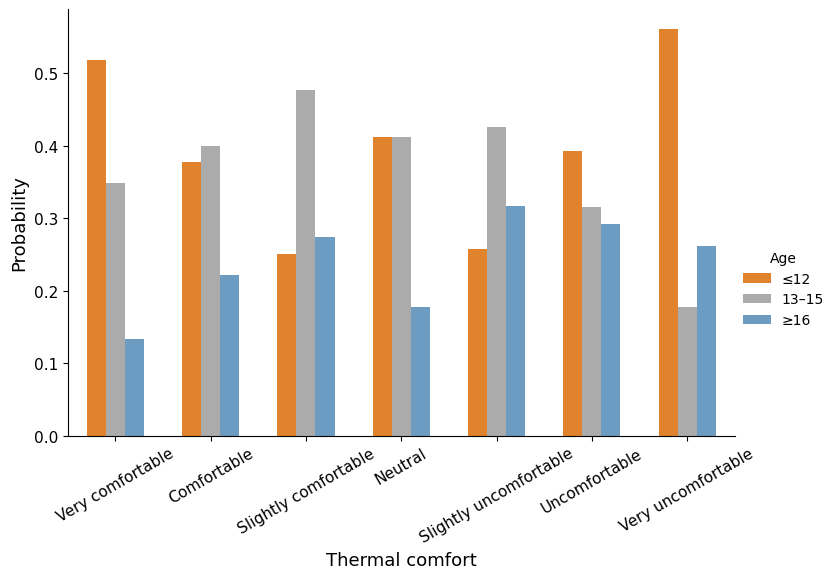

Walking thermal comfort wTCV


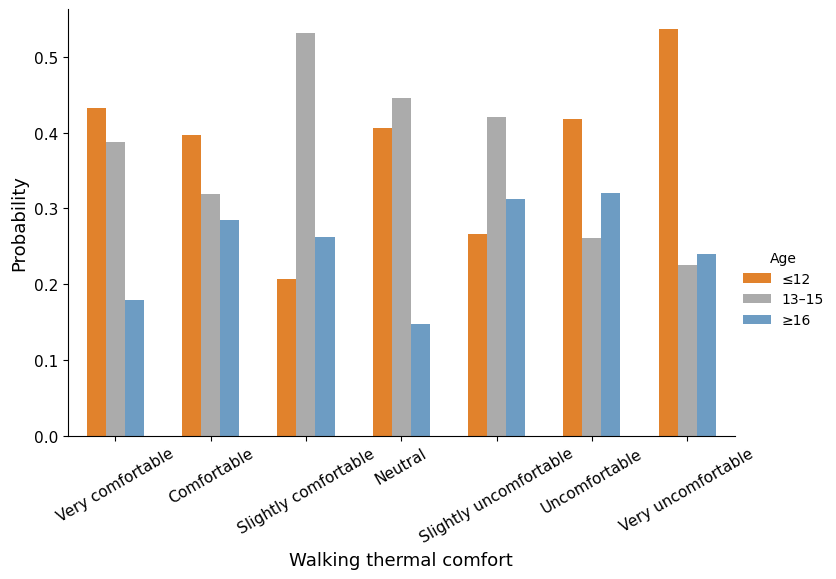

Thermal sensation TSV


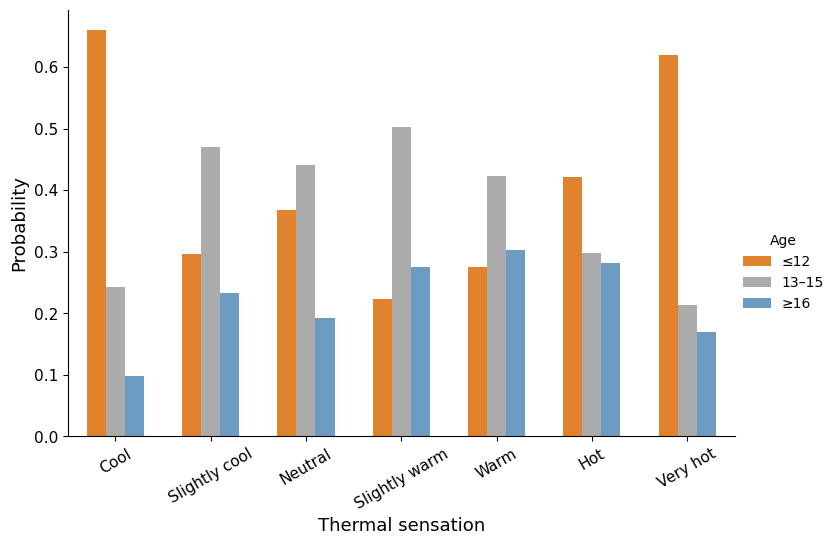

In [17]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


order_age_grouped = ['<12','13-15','>16']
palette_age_grouped = ["#FF800E", "#ABABAB","#5F9ED1"]
age_grouped_labels_clean = ['≤12', '13–15', '≥16']

# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
grouped_histogram(df = df_votes_age_grouped, response_col = 'thermal_comfort',group_col = 'age3', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_age_grouped, hue_order = order_age_grouped, xlabel='Thermal comfort',
                  legend_title = 'Age', group_labels = age_grouped_labels_clean) 

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
grouped_histogram(df = df_votes_age_grouped, response_col = 'thermal_comfort_walking',group_col = 'age3', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_age_grouped, hue_order = order_age_grouped, xlabel='Walking thermal comfort',
                  legend_title = 'Age', group_labels = age_grouped_labels_clean) 

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
grouped_histogram(df = df_votes_age_grouped, response_col = 'thermal_sensation',group_col = 'age3', category_order = categories_TSV, 
                  group_palette = palette_age_grouped, hue_order = order_age_grouped, xlabel='Thermal sensation',
                  legend_title = 'Age', group_labels = age_grouped_labels_clean) 

### 2.3. Line-plots

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def grouped_lineplot(df, response_col, group_col, category_order,
                     group_palette=None, hue_order=None,
                     xlabel=None, ylabel='Probability', legend_title=None,
                     group_labels=None, figsize=(1.5, 5)):
    """
    Plot a line plot showing the normalized distribution (probability) of responses for a categorical variable,
    grouped by another variable (e.g., age, gender).

    Parameters
    ----------
    df : DataFrame
        The input DataFrame.
    response_col : str
        The column name for the response variable (e.g., 'thermal_comfort').
    group_col : str
        The column name to group by (e.g., 'age3', 'gender').
    category_order : list
        Ordered list of the response categories for consistent plotting.
    group_palette : list or dict, optional
        List of colors or dict to use for the group hue palette.
    hue_order : list, optional
        Ordered list of group labels for plotting.
    xlabel : str, optional
        Label for the x-axis.
    ylabel : str, default='Probability'
        Label for the y-axis.
    legend_title : str, optional
        Title of the legend.
    group_labels : list of str, optional
        List of custom names for the legend groups (replaces the default ones).
    figsize : tuple, default=(1.5, 5)
        Size of the plot.
    """

    # Normalize vote counts (get proportions)
    df_norm = df.groupby(group_col)[response_col].value_counts(normalize=True).reset_index(name='proportion')

    # Set category order
    df_norm[response_col] = pd.Categorical(df_norm[response_col], categories=category_order, ordered=True)
    df_norm = df_norm.sort_values(by=[response_col])

    # Plot
    fig, ax = plt.subplots(figsize=(figsize[0]*len(category_order), figsize[1]))

    sns.lineplot(
        data=df_norm,
        x=response_col,
        y='proportion',
        hue=group_col,
        style=group_col,
        palette=group_palette,
        hue_order=hue_order,
        markers=True,
        dashes=False,
        markersize=9,
        ax=ax
    )

    # X-axis labels
    ax.set_xticks(range(len(category_order)))
    ax.set_xticklabels(category_order, rotation=30, fontsize=11)

    # Axis labels
    ax.set_xlabel(xlabel if xlabel else response_col.replace("_", " ").capitalize(), fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.tick_params(axis='y', labelsize=11)

    # Legend
    legend = ax.legend(title=legend_title if legend_title else group_col.capitalize(), fontsize=11, title_fontsize=12)
    if group_labels:
        for t, label in zip(legend.texts, group_labels):
            t.set_text(label)

    plt.tight_layout()
    plt.show()


Thermal comfort TCV


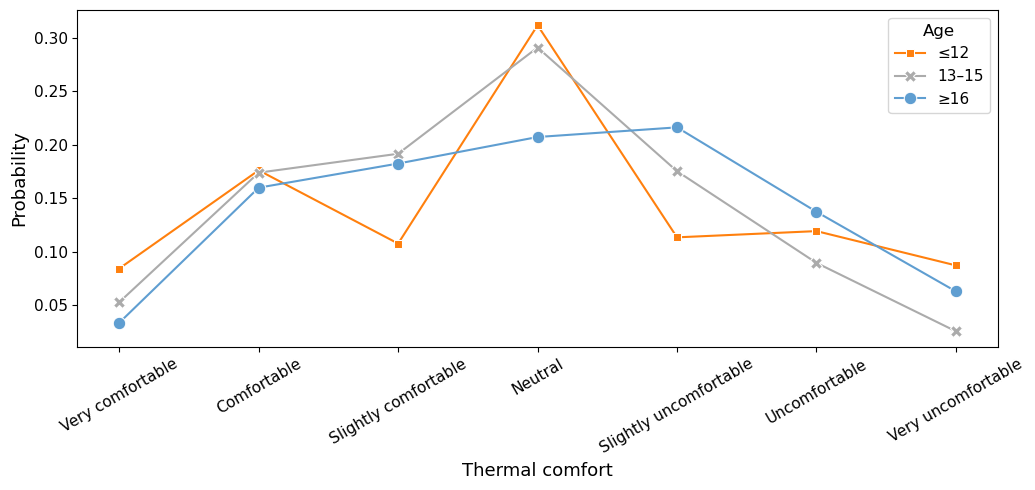

Walking thermal comfort wTCV


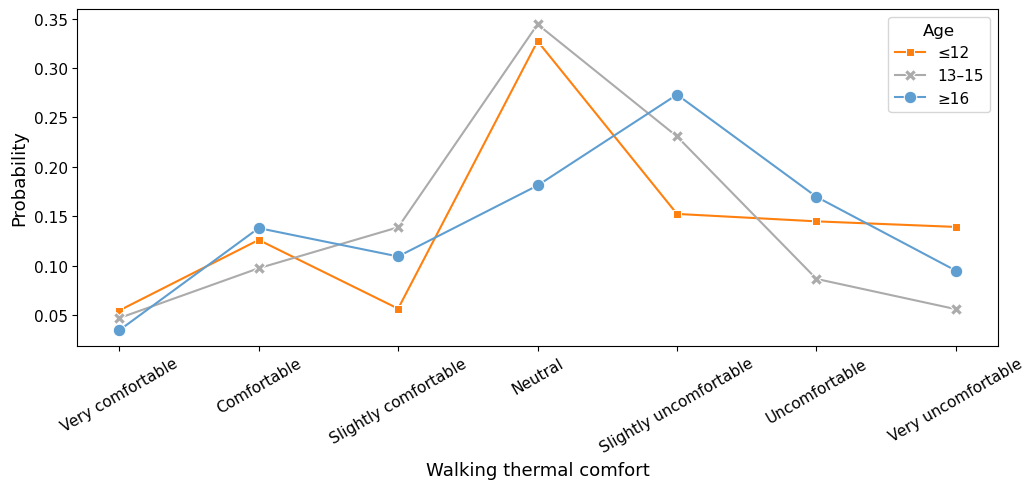

Thermal sensation TSV


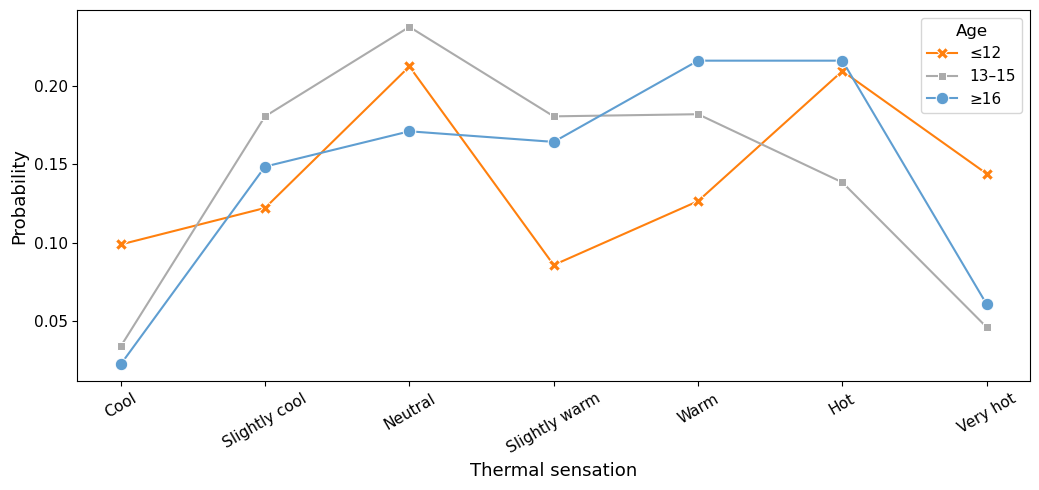

In [19]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


order_age_grouped = ['<12','13-15','>16']
palette_age_grouped = ["#FF800E", "#ABABAB","#5F9ED1"]
age_grouped_labels_clean = ['≤12', '13–15', '≥16']

# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
grouped_lineplot(df = df_votes_age_grouped, response_col = 'thermal_comfort',group_col = 'age3', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_age_grouped, hue_order = order_age_grouped, xlabel='Thermal comfort',
                  legend_title = 'Age', group_labels = age_grouped_labels_clean) 

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
grouped_lineplot(df = df_votes_age_grouped, response_col = 'thermal_comfort_walking',group_col = 'age3', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_age_grouped, hue_order = order_age_grouped, xlabel='Walking thermal comfort',
                  legend_title = 'Age', group_labels = age_grouped_labels_clean) 

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
grouped_lineplot(df = df_votes_age_grouped, response_col = 'thermal_sensation',group_col = 'age3', category_order = categories_TSV, 
                  group_palette = palette_age_grouped, hue_order = order_age_grouped, xlabel='Thermal sensation',
                  legend_title = 'Age', group_labels = age_grouped_labels_clean) 

### 2.4. Horizontal bar-plots

Thermal comfort TCV


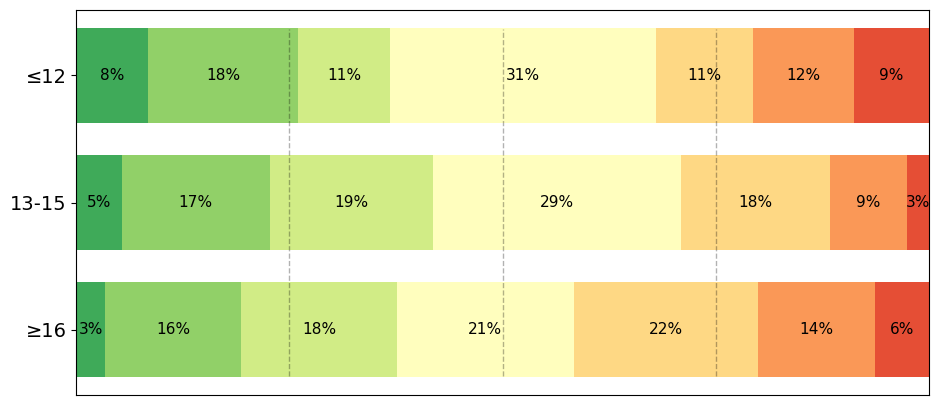

Walking thermal wTCV


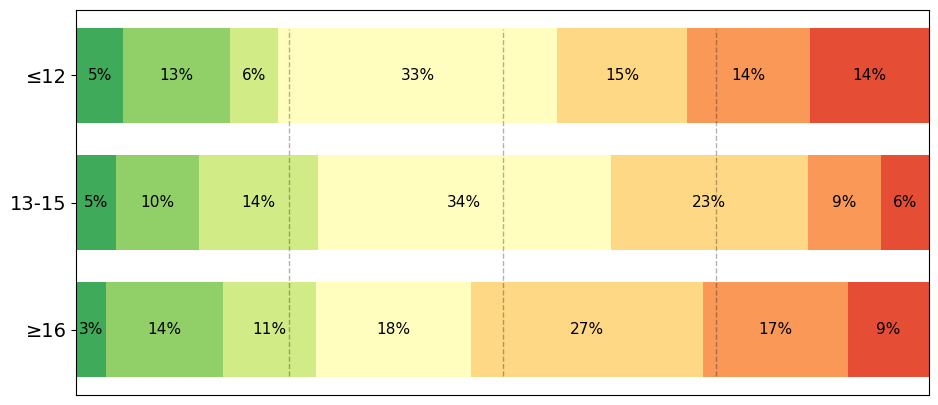

Thermal sensation TSV


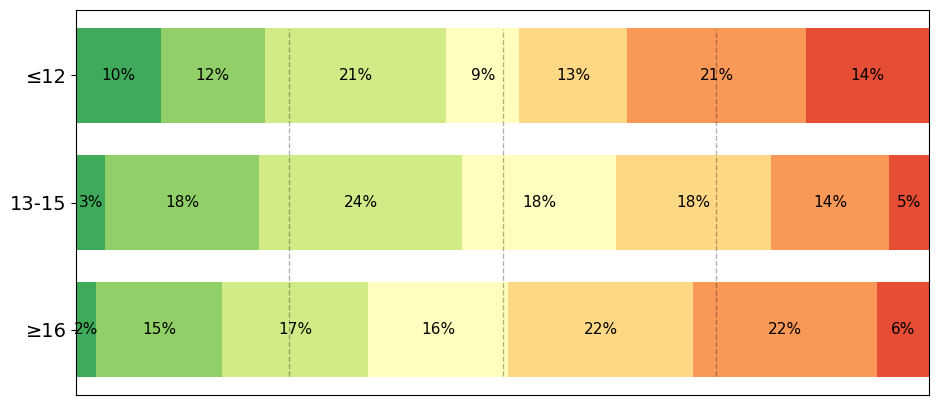

In [22]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']

categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


def count_responses_for_age_grouped(df, name_column, name_group, order_list):
    result = {}

    # Personalized tags for the gender
    tags_age = {"<12": "≤12", "13-15": "13-15", ">16": "≥16"}
    
    # Count by gender
    for age, tags in tags_age.items():
        filtered = df[df[name_group] == age]
        counts = filtered[name_column].value_counts().reindex(order_list, fill_value=0)
        result[tags] = counts.tolist()

    return result


# BAR-PLOT THERMAL COMFORT
print('Thermal comfort TCV')
results_age_TCV = count_responses_for_age_grouped(df_votes_age_grouped, 'thermal_comfort', 'age3', categories_TCV_and_wTCV )
fig, ax = survey_plot(results_age_TCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT THERMAL COMFORT
print('Walking thermal wTCV')
results_age_wTCV = count_responses_for_age_grouped(df_votes_age_grouped, 'thermal_comfort_walking', 'age3', categories_TCV_and_wTCV )
fig, ax = survey_plot(results_age_wTCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT THERMAL COMFORT
print('Thermal sensation TSV')
results_age_TSV = count_responses_for_age_grouped(df_votes_age_grouped, 'thermal_sensation', 'age3', categories_TSV )
fig, ax = survey_plot(results_age_TSV, categories_TSV)  # Plot
plt.show()


<br>

## 3. Using only <12 and 13-15

### 3.1. Statistics


687 votes <12  and 736 votes 13-15

In [23]:
df_votes_age_12 = df_votes_age[df_votes_age['age2']== '<12'].reset_index(drop=True)
df_votes_age_13_15 = df_votes_age[df_votes_age['age2']== '13-15'].reset_index(drop=True)

votes_12 = len(df_votes_age_12)
votes_13_15 = len(df_votes_age_13_15)

print(f'There are {votes_12} votes for the group <12 and {votes_13_15} for the group 13-15')


There are 687 votes for the group <12 and 736 for the group 13-15


####  Age <12

**Socio-dem statistics for <12 group. Using votes**

In [24]:
print(df_votes_age_12['gender'].value_counts())
print('---------------------------------')
print(df_votes_age_12['gender'].value_counts(normalize=True).mul(100).round(1))

gender
Woman                  346
Man                    330
I prefer not to say     11
Name: count, dtype: int64
---------------------------------
gender
Woman                  50.4
Man                    48.0
I prefer not to say     1.6
Name: proportion, dtype: float64


In [25]:
print(df_votes_age_12['spent_time2'].value_counts())
print('---------------------------------')
print(df_votes_age_12['spent_time2'].value_counts(normalize=True).mul(100).round(1))

spent_time2
<1h        195
2h - 4h    183
1h - 2h    164
>4h        145
Name: count, dtype: int64
---------------------------------
spent_time2
<1h        28.4
2h - 4h    26.6
1h - 2h    23.9
>4h        21.1
Name: proportion, dtype: float64


In [26]:
print(df_votes_age_12['neighbourhood_knowledge2'].value_counts())
print('---------------------------------')
print(df_votes_age_12['neighbourhood_knowledge2'].value_counts(normalize=True).mul(100).round(1))

neighbourhood_knowledge2
Good knowledge          215
Very good knowledge     196
Medium knowledge        173
No/Partial knowledge    103
Name: count, dtype: int64
---------------------------------
neighbourhood_knowledge2
Good knowledge          31.3
Very good knowledge     28.5
Medium knowledge        25.2
No/Partial knowledge    15.0
Name: proportion, dtype: float64


####  Age 13-15

**Socio-dem statistics for 13-15 group. Using votes**

In [27]:
print(df_votes_age_13_15['gender'].value_counts())
print('---------------------------------')
print(df_votes_age_13_15['gender'].value_counts(normalize=True).mul(100).round(1))

gender
Man                    366
Woman                  329
I prefer not to say     26
Non-binary              15
Name: count, dtype: int64
---------------------------------
gender
Man                    49.7
Woman                  44.7
I prefer not to say     3.5
Non-binary              2.0
Name: proportion, dtype: float64


In [28]:
print(df_votes_age_13_15['spent_time2'].value_counts())
print('---------------------------------')
print(df_votes_age_13_15['spent_time2'].value_counts(normalize=True).mul(100).round(1))

spent_time2
2h - 4h    239
>4h        227
1h - 2h    174
<1h         96
Name: count, dtype: int64
---------------------------------
spent_time2
2h - 4h    32.5
>4h        30.8
1h - 2h    23.6
<1h        13.0
Name: proportion, dtype: float64


In [29]:
print(df_votes_age_13_15['neighbourhood_knowledge2'].value_counts())
print('---------------------------------')
print(df_votes_age_13_15['neighbourhood_knowledge2'].value_counts(normalize=True).mul(100).round(1))

neighbourhood_knowledge2
Very good knowledge     357
Good knowledge          205
Medium knowledge         97
No/Partial knowledge     77
Name: count, dtype: int64
---------------------------------
neighbourhood_knowledge2
Very good knowledge     48.5
Good knowledge          27.9
Medium knowledge        13.2
No/Partial knowledge    10.5
Name: proportion, dtype: float64


### 3.2. Histograms

#### 3.2.1. Separated

**Group <12**

In [30]:
def histogram(df, column, list_categories):
    '''
    Function that generates a histogram (bar plot) for a categorical column in a DataFrame,
    sorted according to a predefined list of ordered categories.

    It is particularly useful for visualizing distributions of survey responses (e.g. thermal comfort votes),
    ensuring consistent order of categories in the x-axis.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing the categorical data.
        column (str): Name of the column to plot (must contain categorical survey responses).
        list_categories (list): Ordered list of category labels (from most positive to most negative or vice versa).

    Returns:
        None. The function directly displays the histogram using seaborn/matplotlib.
    '''
    
    df2 = df.copy()  # Create a copy to avoid modifying the original DataFrame
    
    # Ensure the column is treated as an ordered categorical variable
    df2[column] = pd.Categorical(df2[column], categories=list_categories, ordered=True)
    
    # Sort DataFrame rows by category order to ensure consistent plotting
    df2.sort_values(by=column, inplace=True)

    # Create histogram (bar plot of frequencies) using seaborn
    g = sns.displot(
        data=df2,
        x=column,
        facecolor='#A2C8EC',    # Light blue fill
        edgecolor='black',      # Black border for bars
        height=5,
        aspect=1.4
    )

    # Customize tick label font sizes and orientation
    plt.xticks(rotation=0, fontsize=15)
    plt.yticks(rotation=0, fontsize=15)

    # Optionally set numeric x-axis labels if the categories represent a scale (1–7, for example)
    g.set_xticklabels([str(i+1) for i in range(len(list_categories))])

    # Access the main axis to customize further
    ax = g.axes[0, 0]
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('Frequency', fontsize=18, labelpad=10)  # y-axis label

    plt.show()
    

Thermal comfort TCV


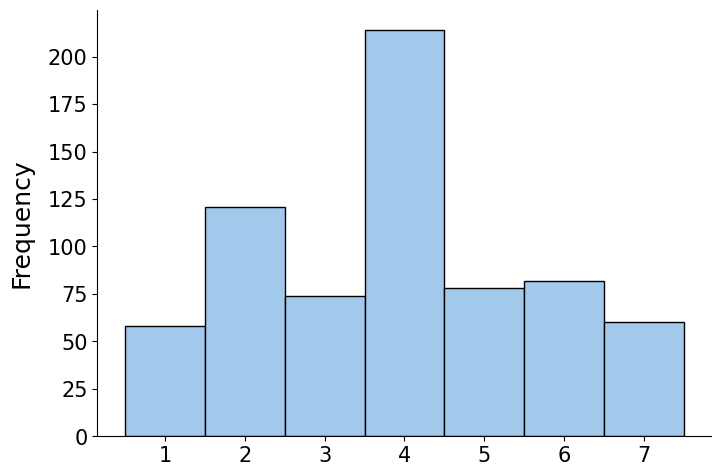

Walking thermal comfort wTCV


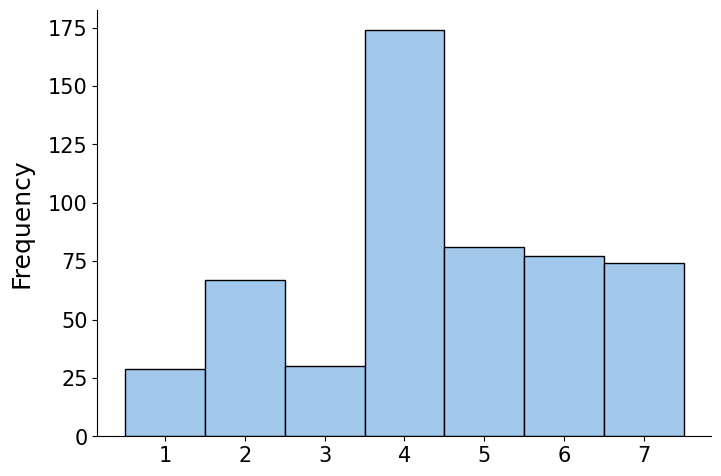

Thermal sensation TSV


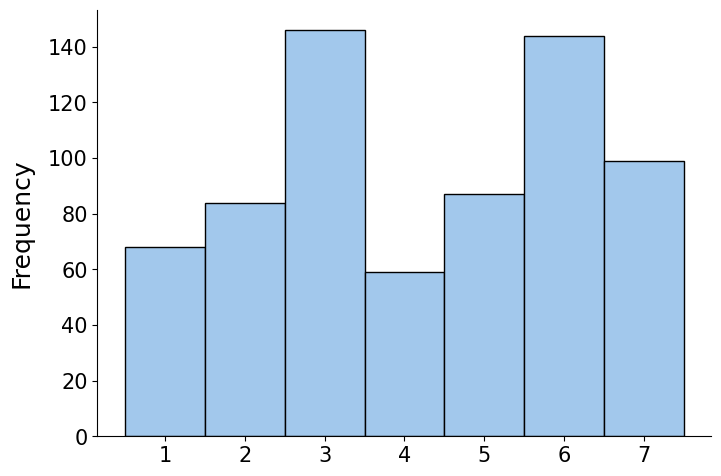

In [31]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
histogram(df_votes_age_12,'thermal_comfort',categories_TCV_and_wTCV)

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
histogram(df_votes_age_12,'thermal_comfort_walking',categories_TCV_and_wTCV)

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
histogram(df_votes_age_12,'thermal_sensation',categories_TSV)


**Group 13-15**

Thermal comfort TCV


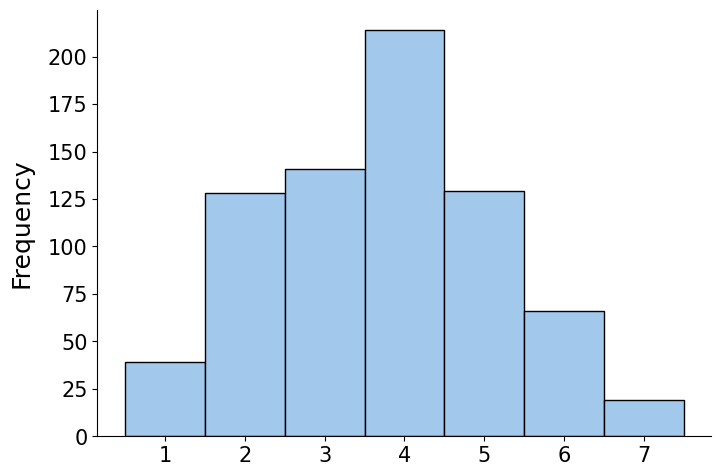

Walking thermal comfort wTCV


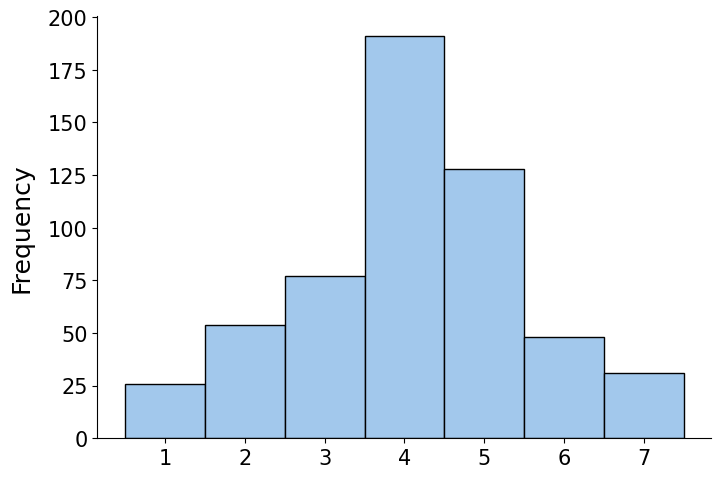

Thermal sensation TSV


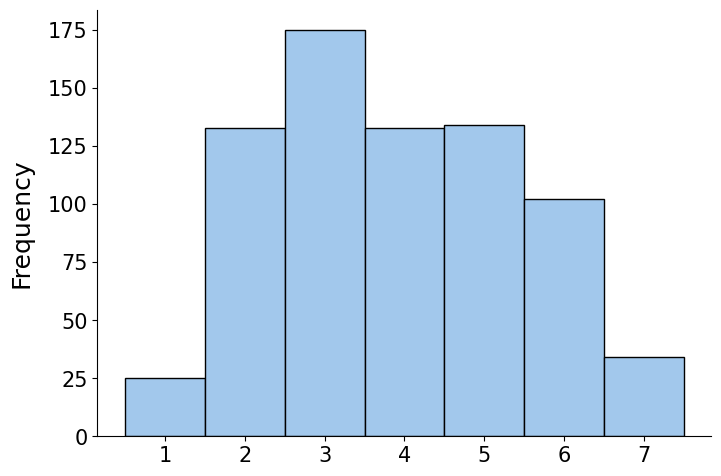

In [32]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
histogram(df_votes_age_13_15,'thermal_comfort',categories_TCV_and_wTCV)

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
histogram(df_votes_age_13_15,'thermal_comfort_walking',categories_TCV_and_wTCV)

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
histogram(df_votes_age_13_15,'thermal_sensation',categories_TSV)


#### 3.2.2. Together

In [35]:
df_votes_age_12_13_15 = pd.concat([df_votes_age_12, df_votes_age_13_15]).reset_index(drop=True)

Thermal comfort TCV


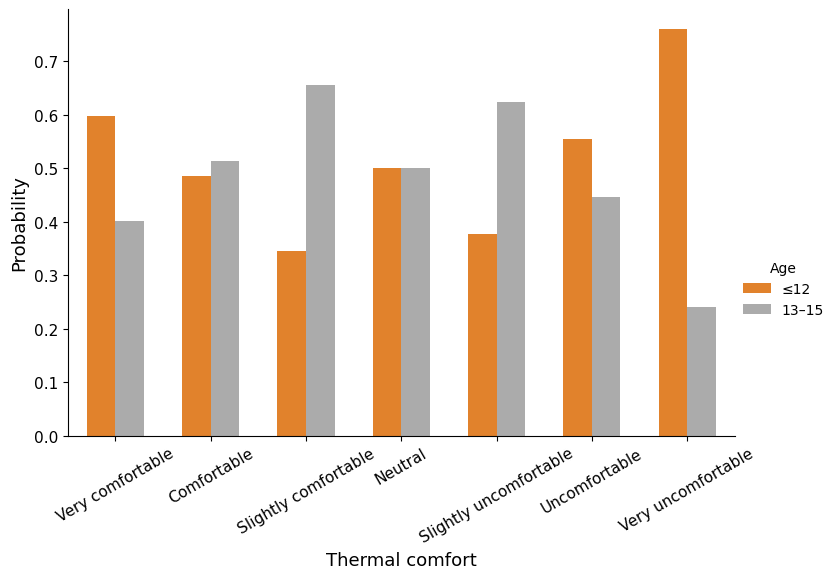

Walking thermal comfort wTCV


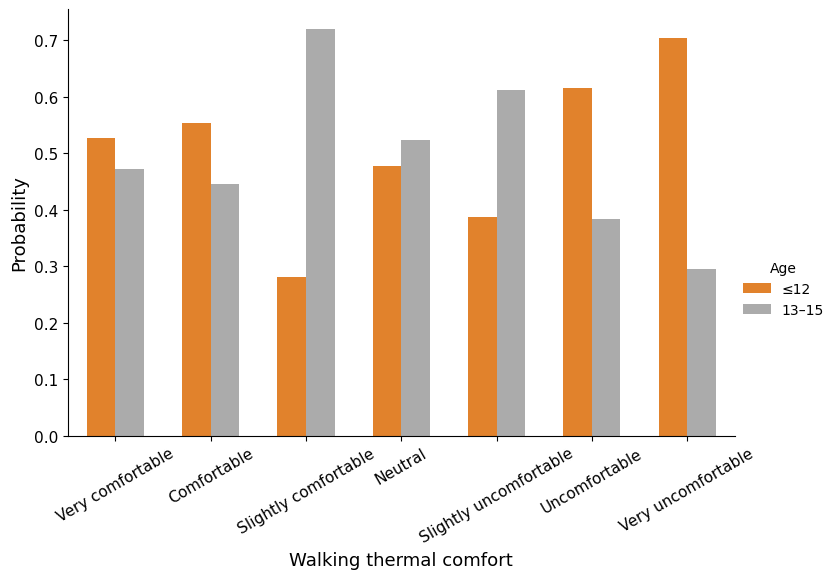

Thermal sensation TSV


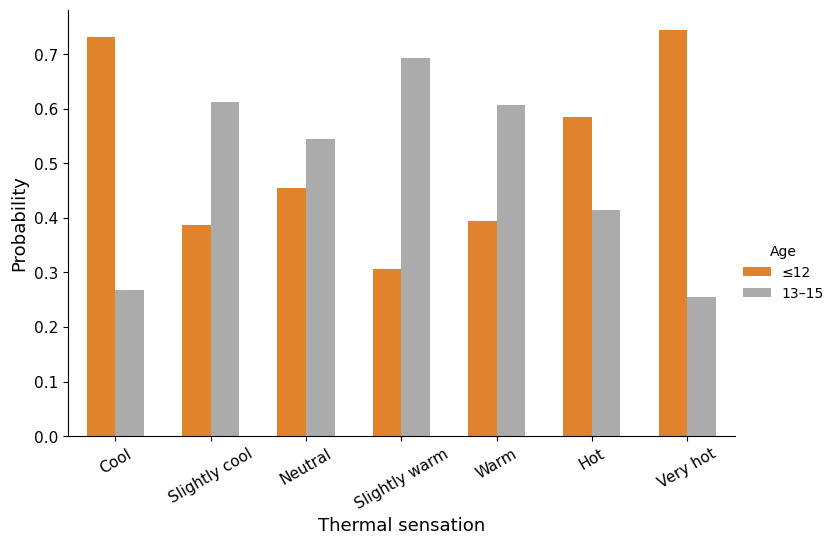

In [39]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


order_age_grouped = ['<12','13-15']
palette_age_grouped = ["#FF800E", "#ABABAB"]
age_grouped_labels_clean = ['≤12', '13–15']

# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
grouped_histogram(df = df_votes_age_12_13_15, response_col = 'thermal_comfort',group_col = 'age2', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_age_grouped, hue_order = order_age_grouped, xlabel='Thermal comfort',
                  legend_title = 'Age', group_labels = age_grouped_labels_clean) 

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
grouped_histogram(df = df_votes_age_12_13_15, response_col = 'thermal_comfort_walking',group_col = 'age2', category_order = categories_TCV_and_wTCV, 
                  group_palette = palette_age_grouped, hue_order = order_age_grouped, xlabel='Walking thermal comfort',
                  legend_title = 'Age', group_labels = age_grouped_labels_clean) 

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
grouped_histogram(df = df_votes_age_12_13_15, response_col = 'thermal_sensation',group_col = 'age2', category_order = categories_TSV, 
                  group_palette = palette_age_grouped, hue_order = order_age_grouped, xlabel='Thermal sensation',
                  legend_title = 'Age', group_labels = age_grouped_labels_clean) 